# Explore data
Explore data sources for the DPSeq

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

# autoreload changes from local files
%load_ext autoreload
%autoreload 2

# pandas show full output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('max_colwidth', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [2]:
PATH_DATA = Path("/Users/dknoors/data/eicu-crd/2.0")

In [3]:
df_patient = pd.read_csv(PATH_DATA / "patient.csv")
df_patient.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,0,Direct Admit,2015,03:50:00,3596,Death,Expired,Med-Surg ICU,15:54:00,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Alive,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870
2,141179,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-22,Emergency Department,2015,19:20:00,2042,Home,Alive,Med-Surg ICU,09:18:00,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,-780,Floor,2015,23:30:00,12492,Home,Alive,CTICU,07:18:00,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276
4,141196,128943,Male,71,Caucasian,67,109,NaN,162.6,20:21:00,-99,Emergency Department,2015,17:00:00,5460,Home,Alive,Med-Surg ICU,22:00:00,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665


In [4]:
df_treatment = pd.read_csv(PATH_DATA / "treatment.csv")
df_treatment.head()

,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
0,8399138,242040,198,cardiovascular|hypertension|angiotensin II receptor blocker (ARB)|losartan,False
1,8626134,242040,198,cardiovascular|myocardial ischemia / infarction|antihyperlipidemic agent|HMG-CoA reductase inhib...,False
2,8517569,242040,198,infectious diseases|medications|therapeutic antibacterials|macrolide|azithromycin,False
3,9597686,242040,616,cardiovascular|non-operative procedures|diagnostic ultrasound of heart|transthoracic echocardiog...,False
4,9334096,242040,618,infectious diseases|medications|therapeutic antibacterials|vancomycin,True


In [5]:
df_treatment.patientunitstayid.unique()[:5]

array([242040, 242070, 242082, 242083, 242154])

In [6]:
df_treatment.shape

(3688745, 5)

In [7]:
df_medication = pd.read_csv(PATH_DATA / "medication.csv")
df_medication.head()

/var/folders/t3/ty1t9y4x6mx9yl___3gy66n80000gn/T/ipykernel_26877/3873542306.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_medication = pd.read_csv(PATH_DATA / "medication.csv")


,medicationid,patientunitstayid,drugorderoffset,drugstartoffset,drugivadmixture,drugordercancelled,drugname,drughiclseqno,dosage,routeadmin,frequency,loadingdose,prn,drugstopoffset,gtc
0,7426715,141168,309,666,No,No,METOPROLOL TARTRATE 25 MG PO TABS,2102.0,25 3,PO,Q12H SCH,NaN,No,1826,0
1,9643232,141168,1847,1832,No,No,3 ML - IPRATROPIUM-ALBUTEROL 0.5-2.5 (3) MG/3ML IN SOLN,NaN,3 1,NEBULIZATION,Q4H Resp PRN,NaN,Yes,2047,0
2,10270090,141168,296,1386,No,No,ASPIRIN EC 81 MG PO TBEC,1820.0,81 3,PO,Daily,NaN,No,2390,0
3,9496768,141168,2048,2029,No,No,3 ML - IPRATROPIUM-ALBUTEROL 0.5-2.5 (3) MG/3ML IN SOLN,NaN,3 1,NEBULIZATION,Q4H Resp PRN,NaN,Yes,2390,0
4,11259680,141168,117,246,No,No,ENOXAPARIN SODIUM 40 MG/0.4ML SC SOLN,NaN,40 3,SC,Daily,NaN,No,1721,0


## Explore patients

In [24]:
df_treatment.patientunitstayid.unique()

array([ 242040,  242070,  242082, ..., 3353251, 3353254, 3353263])

In [29]:
patient_id = 242082

df_patient[df_patient["patientunitstayid"] == patient_id]

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
14986,242082,207269,Male,75,Caucasian,108,136,"Sepsis, renal/UTI (including bladder)",175.3,21:55:00,0,Emergency Department,2015,16:30:00,6875,Home,Alive,Med-Surg ICU,21:55:00,Emergency Department,1,admit,90.7,104.3,19:47:00,2752,Floor,Alive,003-56172


In [30]:
df_treatment_i = df_treatment[df_treatment["patientunitstayid"] == patient_id]
df_treatment_i

,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
81,8529745,242082,240,infectious diseases|cultures / immuno-assays|cultures|blood,False
82,10365574,242082,903,renal|electrolyte correction|electrolyte administration|phosphate,True
83,8417772,242082,903,renal|electrolyte correction|electrolyte administration|magnesium,True
84,8023747,242082,903,gastrointestinal|medications|stress ulcer treatment|famotidine,True
85,9671238,242082,107,"gastrointestinal|radiology, diagnostic and procedures|CT scan|abdomen",False
86,9359738,242082,903,cardiovascular|intravenous fluid|normal saline administration|aggressive volume resuscitation (>...,True
87,8495429,242082,240,cardiovascular|intravenous fluid|normal saline administration|aggressive volume resuscitation (>...,False
88,8997754,242082,240,infectious diseases|medications|therapeutic antibacterials,False
89,8628254,242082,903,"gastrointestinal|radiology, diagnostic and procedures|CT scan|pelvis",True
90,9596754,242082,903,cardiovascular|vascular disorders|VTE prophylaxis|compression boots,True


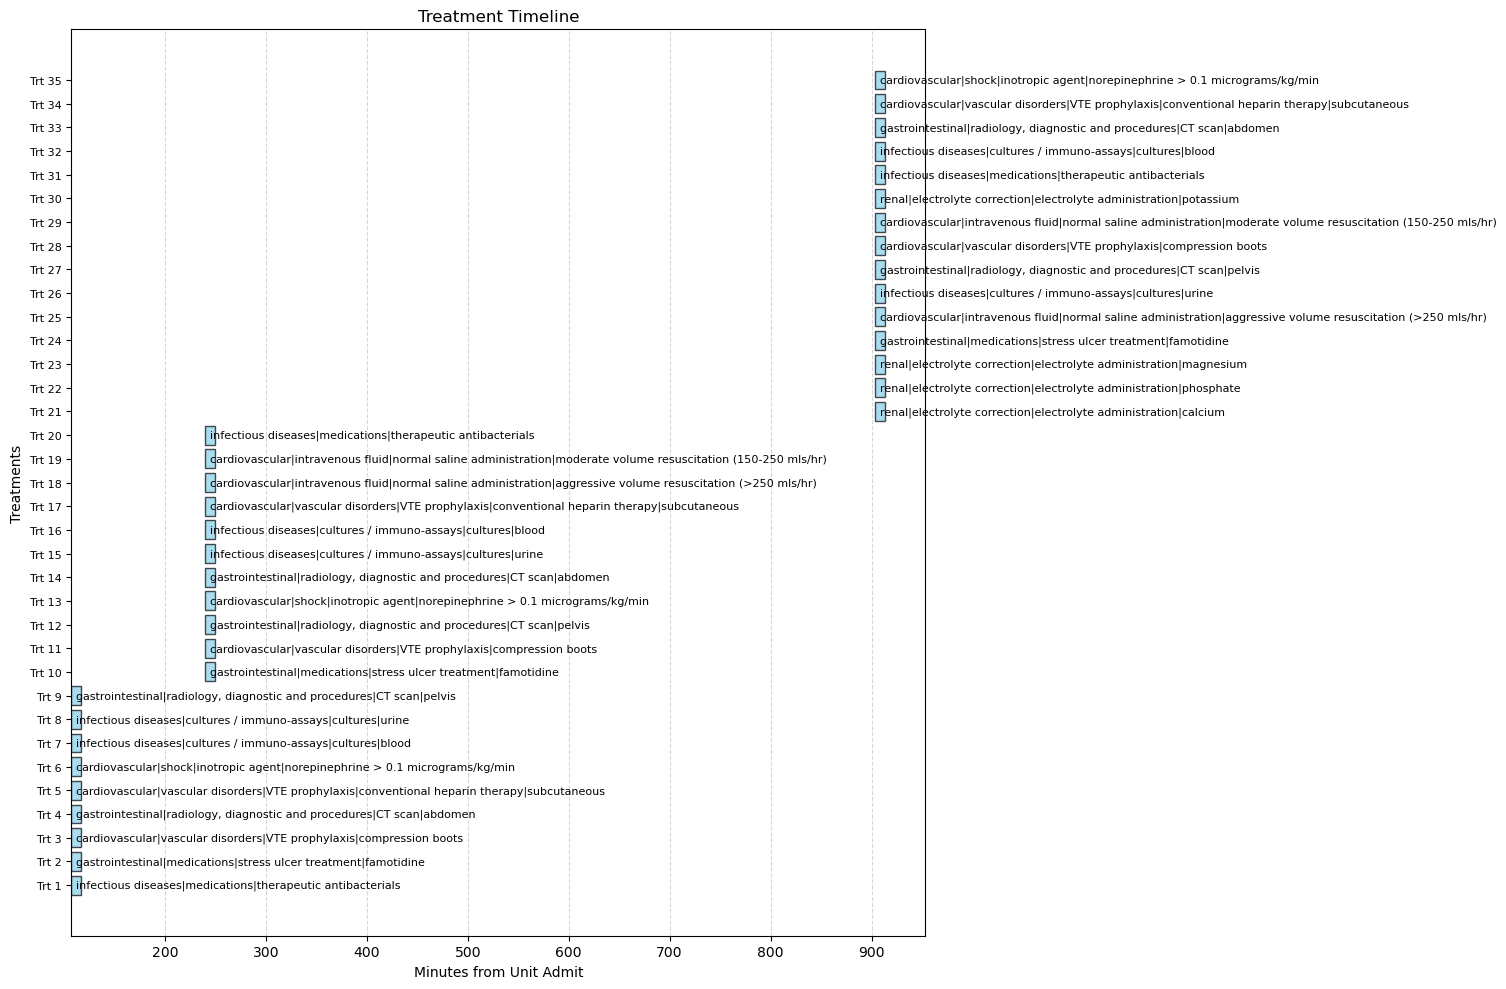

In [31]:
import matplotlib.pyplot as plt

def plot_gantt_chart(df, treatment_col, offset_col, title="Treatment Timeline", figsize=(15, 10)):
    """
    Plots a compact Gantt chart for treatments based on offset times.
    
    Parameters:
    - df: pd.DataFrame
        The input DataFrame containing treatment and offset information.
    - treatment_col: str
        The column name containing treatment names.
    - offset_col: str
        The column name containing treatment offsets (in minutes).
    - title: str, optional
        The title of the plot. Default is "Treatment Timeline".
    - figsize: tuple, optional
        The figure size. Default is (12, 8).
    
    Returns:
    - None: Displays the plot.
    """
    # Sort the DataFrame by the offset column
    df = df.sort_values(by=offset_col).reset_index(drop=True)
    
    # Create the plot
    plt.figure(figsize=figsize)
    for i, row in df.iterrows():
        # Plot each treatment as a short bar
        plt.barh(i, 10, left=row[offset_col], color="skyblue", edgecolor="black", alpha=0.7)  # Width is fixed (10 units)
        # Add the treatment label near the bar
        plt.text(row[offset_col] + 5, i, row[treatment_col], va="center", ha="left", fontsize=8)  # Adjust text position
    
    # Format axes and layout
    plt.yticks(range(len(df)), [f"Trt {i+1}" for i in range(len(df))], fontsize=8)  # Use short indices for labels
    plt.xlabel("Minutes from Unit Admit")
    plt.ylabel("Treatments")
    plt.title(title)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_gantt_chart(df_treatment_i, treatment_col="treatmentstring", offset_col="treatmentoffset")

In [32]:
df_treatment_i.sort_values(by="treatmentoffset")

,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
115,8178177,242082,107,infectious diseases|medications|therapeutic antibacterials,False
113,8003975,242082,107,gastrointestinal|medications|stress ulcer treatment|famotidine,False
111,9471702,242082,107,cardiovascular|vascular disorders|VTE prophylaxis|compression boots,False
85,9671238,242082,107,"gastrointestinal|radiology, diagnostic and procedures|CT scan|abdomen",False
109,8210151,242082,107,cardiovascular|vascular disorders|VTE prophylaxis|conventional heparin therapy|subcutaneous,False
108,9810774,242082,107,cardiovascular|shock|inotropic agent|norepinephrine > 0.1 micrograms/kg/min,False
106,10247470,242082,107,infectious diseases|cultures / immuno-assays|cultures|blood,False
104,10135013,242082,107,infectious diseases|cultures / immuno-assays|cultures|urine,False
100,9761142,242082,107,"gastrointestinal|radiology, diagnostic and procedures|CT scan|pelvis",False
112,8118160,242082,240,gastrointestinal|medications|stress ulcer treatment|famotidine,False
